In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from colorama import Fore, Back, Style

In [4]:
DATA_DIR = "../input/emotionclss/"
train = {"input": [], "labels": []}
dev = {"input": [], "labels": []}
test = {"input": [], "labels": []}

with open(DATA_DIR + "train.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        train["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        train["labels"].append(one_hot)

with open(DATA_DIR + "dev.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        dev["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        dev["labels"].append(one_hot)

with open(DATA_DIR + "test.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        test["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        test["labels"].append(one_hot)
        
print("Number of train examples are {}".format(len(train["input"])))
print("Number of dev examples are {}".format(len(dev["input"])))
print("Number of test examples are {}".format(len(test["input"])))

Number of train examples are 43410
Number of dev examples are 5426
Number of test examples are 5427


## Analysing Train data

In [5]:
index_label = {0:"admiration", 1:"amusement", 2:"anger", 3:"annoyance", 4:"approval", 5:"caring", 6:"confusion",
            7:"curiosity", 8:"desire", 9:"disappointment", 10:"disapproval", 11:"disgust", 12:"embarrassment",
            13:"excitement", 14:"fear", 15:"gratitude", 16:"grief", 17:"joy", 18:"love", 19:"nervousness",
            20:"optimism", 21:"pride", 22:"realization", 23:"relief", 24:"remorse", 25:"sadness",
            26:"surprise", 27:"neutral"}
label_list = list(index_label.values())
print("Emotions are {}".format(label_list))

Emotions are ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


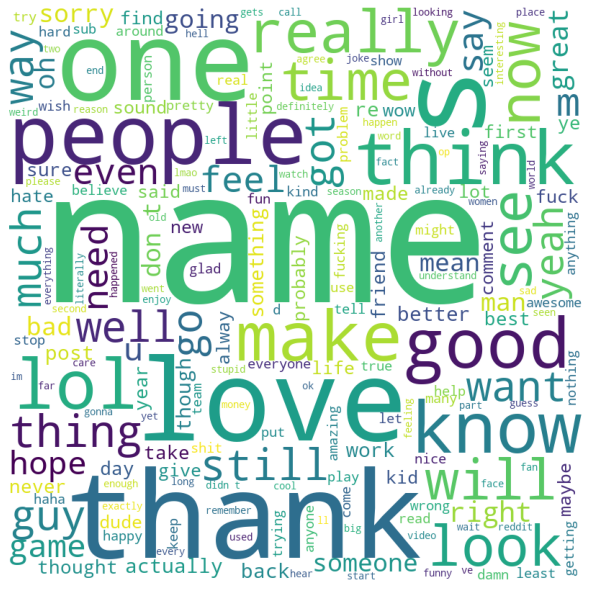

In [25]:
comment_words = ''
stopwords = set(STOPWORDS)

for text in train["input"]:
    tokens = text.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [62]:
# Some emotion texts
emotion_texts = {}
for i in range(28):
    emotion_texts[i] = []

for i, input_ in enumerate(train["input"]):
    labels = train["labels"][i]
    for index,label in enumerate(labels):
        if label == 1:
            emotion_texts[index].append(input_)

In [63]:
for i in range(28):
    print(Fore.BLACK + label_list[i])
    print(Fore.RED + emotion_texts[i][0])
    print(Fore.RED + emotion_texts[i][1])

admiration
Damn youtube and outrage drama is super lucrative for reddit
Famous for his 3-4 Defense
amusement
Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
LOL. Super cute!
anger
WHY THE FUCK IS BAYLESS ISOING
Fucking coward.
annoyance
Dirty Southern Wankers
[NAME] - same fucking problem, slightly better command of the English language.
approval
Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
You can always kneel.
caring
R/sleeptrain Might be time for some sleep training. Take a look and try to feel out what's right for your family.
Good for #70 to console the poor guy
confusion
Demographics? I don’t know anybody under 35 who has cable tv.
Maybe that’s what happened to the great white at Houston zoo
curiosity
Ok, then what the actual fuck is your plan?
It's crazy how far Photoshop has come. Underwater bridges?!! NEVER!!!
desire
W

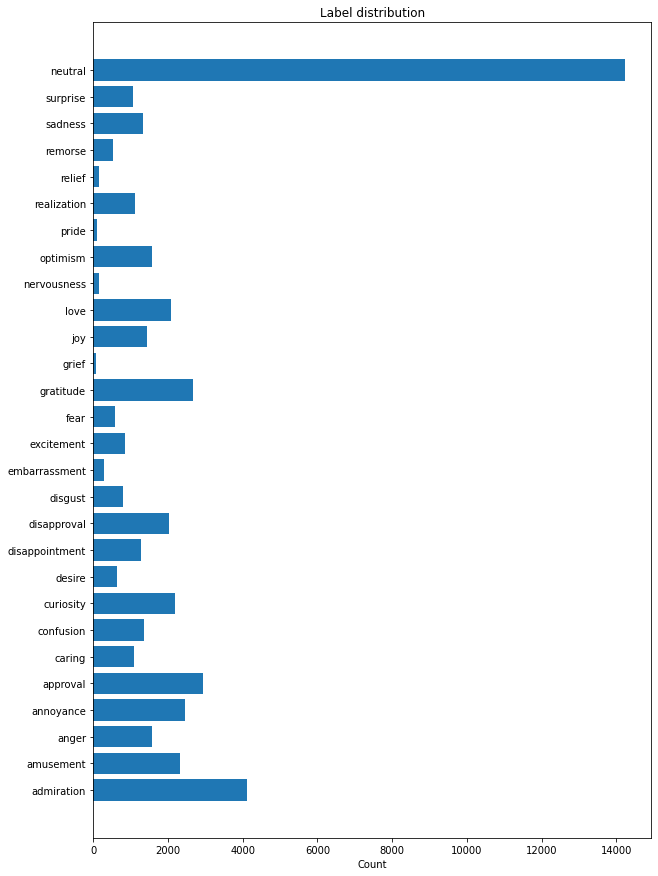

In [23]:
emotion_cnt = list(np.zeros(28))

train_inputs = train["input"]
train_labels = train["labels"]
for label in train_labels:
    for index in range(28):
        if label[index] == 1: emotion_cnt[index] += 1

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(10)
y = np.arange(len(emotion_cnt))
ax.barh(y, emotion_cnt, align='center')
ax.set_yticks(y, labels=label_list)
ax.set_xlabel('Count')
ax.set_title('Label distribution')

plt.show()

## Classwise word distribution

In [57]:
# Most frequent unigrams
unigrams = {}
stop_words = set(stopwords.words('english'))
for i in range(28):
    unigrams[i] = {}

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~`’'''
remove = set(["'s", "n't", "'m", "...", "'re", "NAME"])
n = 1
for i, input_ in enumerate(train["input"]):
    tokens = list(word_tokenize(input_))
    tokens_filtered = [w for w in tokens if (w.lower() not in stop_words and w.lower() not in punc 
                                             and w.lower() not in remove)]
    grams = list(ngrams(tokens_filtered, n))
    
    labels = train["labels"][i]
    for index,label in enumerate(labels):
        if label == 1:
            for token in grams:
                if token[0] in unigrams[index]: unigrams[index][token[0]] += 1
                else: unigrams[index][token[0]] = 0

In [58]:
for i in range(28):
    print(Fore.BLACK + "Most common 5 unigrams for emotion '{}' are".format(index_label[i]))
    d = Counter(unigrams[i])
    for key, value in d.most_common(5):
        print(Fore.RED + "{}: {}".format(key, value))

Most common 5 unigrams for emotion 'admiration' are
NAME: 742
good: 464
great: 440
like: 310
amazing: 217
Most common 5 unigrams for emotion 'amusement' are
lol: 641
NAME: 354
Lol: 283
funny: 176
like: 175
Most common 5 unigrams for emotion 'anger' are
NAME: 280
hate: 152
fuck: 127
fucking: 122
like: 100
Most common 5 unigrams for emotion 'annoyance' are
NAME: 390
like: 194
people: 170
get: 124
one: 96
Most common 5 unigrams for emotion 'approval' are
NAME: 405
like: 247
right: 165
agree: 157
think: 136
Most common 5 unigrams for emotion 'caring' are
NAME: 120
get: 90
better: 63
help: 63
need: 57
Most common 5 unigrams for emotion 'confusion' are
NAME: 218
know: 143
sure: 125
like: 95
think: 77
Most common 5 unigrams for emotion 'curiosity' are
NAME: 354
would: 139
like: 131
know: 124
curious: 111
Most common 5 unigrams for emotion 'desire' are
wish: 201
NAME: 140
want: 104
like: 71
could: 68
Most common 5 unigrams for emotion 'disappointment' are
NAME: 218
bad: 111
like: 99
really: 79